# Impacts on Bundesliga Results
## by Frederik Riess

## Investigation Overview

The focus lies on match statistics which may be important for a final match result. The aim is to find out, whether there are existing dependencies which let conclude for a win of a team.

## Dataset Overview

The 1. Bundesliga was founded in 1962 and is the german national football league. This dataset consists of collected statistics from Bundesliga matches over the past 15 seasons and also the already started season this year. With 4356 matches and variables like the number of scored goals and the shots on target there were a lot of parameters to analyse.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bundesliga_data.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of the different results

The most common result of a Bundesliga match is a win by the Home Team, followed from the away team wins and the draws. Nearly 45% of the matches were won by the home team.

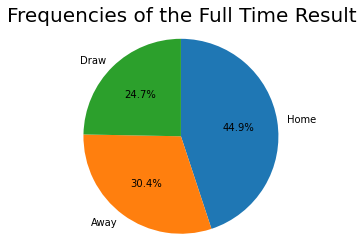

In [36]:
# Set the base color
base_color = sb.color_palette()[0]

# Frequencies of the full time results
sorted_counts = df['FTR'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title('Frequencies of the Full Time Result', fontsize=20);
plt.axis('square');

## But what are good indicators for those results?

## Dependency of the Half time Result

While there seems to be a clear trend that a team wins if the same team leads during half time, the result is pretty unpredictable if the half time result is a draw.

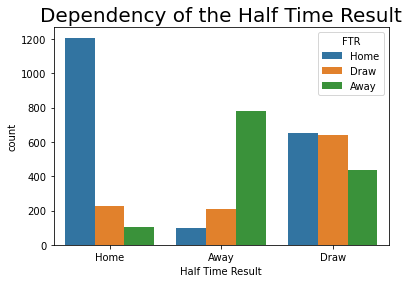

In [35]:
# Dependency of the Half Time Result
sb.countplot(data = df, x = 'HTR', hue = 'FTR');
plt.title('Dependency of the Half Time Result', fontsize=20)
plt.xlabel('Half Time Result');

## Dependency of the Shots on Target

In the mean, the more shots on target the more likely is a win by a team. Interestingly, there is also win by a home team which did not have any shot on target. They just won by an own goal from the away team.

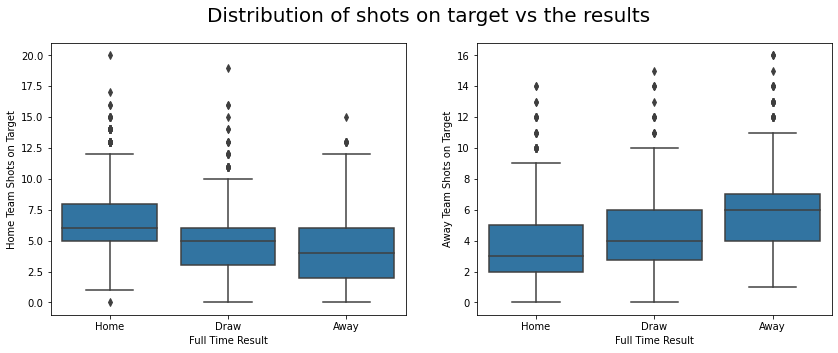

In [34]:
# Box plots for shots on target regarding the full time result
fig = plt.figure(figsize=[14,5])
fig.suptitle('Distribution of shots on target vs the results', fontsize=20)

plt.subplot(1, 2, 1)
sb.boxplot(data=df, x='FTR', y='HST', color=base_color);
plt.xlabel('Full Time Result')
plt.ylabel('Home Team Shots on Target')

plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='FTR', y='AST', color=base_color);
plt.xlabel('Full Time Result')
plt.ylabel('Away Team Shots on Target');

## Dependency of the Shot difference

The comparison and the done observations regarding the shots on target lead to the logical conclusion that there should also be a dependency between the shot difference and the result. Indeed, if the home team has more shots on target than the away team, only around 14% of those matches could be won by the away team.

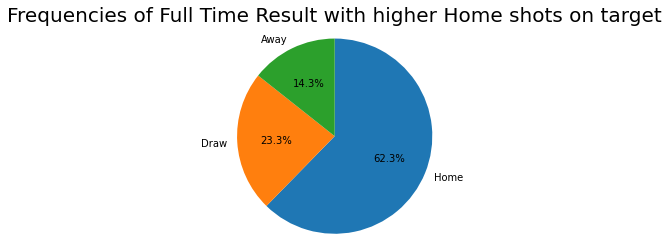

In [33]:
# Distribution of results with a positive shot diff
df_pos_shot_diff = df[(df['HST']-df['AST']) > 0]
sorted_counts = df_pos_shot_diff['FTR'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title('Frequencies of Full Time Result with higher Home shots on target', fontsize=20);
plt.axis('square');

## Dependency of the Shot difference and Half Time Result

To go even deeper, the mean shot difference and the half time result lead to following conclusions:
- If the home team wins, the mean shot difference is above 2.4.
- If the result is a draw, the mean shot differnce ist between 0 and 1.
- If the away team wins, the mean shot difference is below -1.

Even without including the half time result, there is a dependency between the mean shot difference and the Full Time Result.

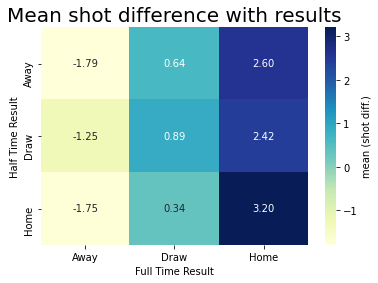

In [32]:
# Calculate shot difference
df['diff'] = df['HST']-df['AST']

# Plot the mean shot difference regarding the results
plt.title('Mean shot difference with results', fontsize=20)
diff_means = df.groupby(['FTR', 'HTR']).mean()['diff']
diff_means = diff_means.reset_index(name = 'num_var2_avg')
diff_means = diff_means.pivot(index = 'HTR', columns = 'FTR',
                            values = 'num_var2_avg')
sb.heatmap(diff_means, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'mean (shot diff.)'}, cmap="YlGnBu");
plt.xlabel('Full Time Result')
plt.ylabel('Half Time Result');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!